In [1]:
#importing the all required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
#Reading the 'climate_change.csv' attached
df=pd.read_csv('climate_change.csv')

In [3]:
#displaying the first 5 rows of the Dataframe 'df'
df.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,346.80,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,346.10,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [4]:
#df.describe function is used to display the count,mean,std deviation,min,max for a numerical columns in a dataframe
df.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.247857,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.616062,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


In [5]:
#to check the count of missing values in each columns of a df
df.isnull().sum()

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

In [6]:
#to check the datatype of each column in a df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


In [7]:
#astype(float) is used to convert the column to float
df['Year'] = df['Year'].astype(float)
df['Month'] = df['Month'].astype(float)

In [8]:
#checking whether all the columns are in same datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    float64
 1   Month     308 non-null    float64
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(11)
memory usage: 26.6 KB


In [9]:
#to check the correlation of all numerical columns in a df
df.corr()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,1.000000,-0.025789,-0.145345,0.984942,0.910563,0.994850,0.460965,0.870067,0.022353,-0.361884,0.755731
Month,-0.025789,1.000000,-0.016345,-0.096017,0.017558,0.012395,-0.014914,-0.001084,-0.032754,0.014845,-0.098016
MEI,-0.145345,-0.016345,1.000000,-0.151313,-0.105555,-0.162375,0.088171,-0.039836,-0.076826,0.352351,0.135292
CO2,0.984942,-0.096017,-0.151313,1.000000,0.870111,0.980798,0.397404,0.821097,0.019147,-0.367112,0.749442
CH4,0.910563,0.017558,-0.105555,0.870111,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,0.699697
N2O,0.994850,0.012395,-0.162375,0.980798,0.894409,1.000000,0.412155,0.839295,0.039892,-0.353499,0.743242
CFC-11,0.460965,-0.014914,0.088171,0.397404,0.713504,0.412155,1.000000,0.831381,0.284629,-0.032302,0.380111
CFC-12,0.870067,-0.001084,-0.039836,0.821097,0.958237,0.839295,0.831381,1.000000,0.189270,-0.243785,0.688944
TSI,0.022353,-0.032754,-0.076826,0.019147,0.146335,0.039892,0.284629,0.189270,1.000000,0.083238,0.182186
Aerosols,-0.361884,0.014845,0.352351,-0.367112,-0.290381,-0.353499,-0.032302,-0.243785,0.083238,1.000000,-0.392069


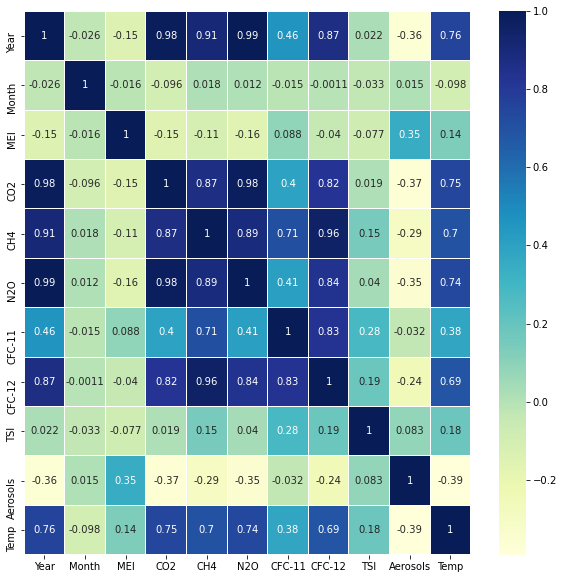

In [10]:
#plotting the correlation of a columns using the Heatmap plot
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df.corr(),annot=True,linewidths=0.01,ax=ax, cmap="YlGnBu")

In [11]:
#saving the column names to a variable
col=df.columns
col

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

In [12]:
#deleting the columns names using index
col=col.delete([0,1,4,10])

In [13]:
#printing the required columns names
col

Index(['MEI', 'CO2', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols'], dtype='object')

In [14]:
#splitting the data into Train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[col],df['Temp'],test_size=0.3,random_state =5149)

In [15]:
#importing the linear regression model from statsmodels library
import statsmodels.api as sm
x_trainc = sm.add_constant(x_train)#adding a constant to the model, because dont want the linear reg line to pass through origin.
x_testc = sm.add_constant(x_test)#adding a constant to the model, because dont want the linear reg line to pass through origin.
lm = sm.OLS(y_train,x_trainc) 
lm2 = lm.fit() #fitting the model in lm2 varaible
print(lm2.summary()) # printing the summary of the linear regression

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     88.76
Date:                Wed, 02 Sep 2020   Prob (F-statistic):           7.81e-59
Time:                        16:19:20   Log-Likelihood:                 208.64
No. Observations:                 215   AIC:                            -401.3
Df Residuals:                     207   BIC:                            -374.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -139.3062     24.415     -5.706      0.0

In [16]:
y_pred_test= lm2.predict(x_testc) #predicting the y values of train and test
y_pred_train= lm2.predict(x_trainc)

In [17]:
#importing the metric score library
from sklearn import metrics
from sklearn.metrics import r2_score
print("Training Data Score")
print('MAE:', round(metrics.mean_absolute_error(y_train, y_pred_train),3))
print('MSE:', round(metrics.mean_squared_error(y_train, y_pred_train),3))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),3))
print('R2:',round(r2_score(y_train, y_pred_train),3),"\n")
print("Testing Data Score")
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred_test),3))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred_test),3))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),3))
print('R2:',round(r2_score(y_test, y_pred_test),3))

Training Data Score
MAE: 0.071
MSE: 0.008
RMSE: 0.092
R2: 0.75 

Testing Data Score
MAE: 0.069
MSE: 0.008
RMSE: 0.088
R2: 0.724


In [18]:
SSE=sum((y_train-y_pred_train)**2)
print("SSE :", "%.2f" % SSE)
TSS= sum((y_train- np.mean(y_train))**2)
print("TSS :", "%.2f" % TSS)
R2=1-(SSE/TSS)
print("R2 :", "%.2f" % R2)

SSE : 1.81
TSS : 7.23
R2 : 0.75


In [19]:
#For Multivariate analysis R2 is the correlation between [Actual and predicted]2 values
y_train.corr(y_pred_train)**2

0.7501066086059783

In [20]:
#Calculation the Adjusted R2 manullay 
train_n=len(y_train)
train_k=len(col)
Adj_R2=1-((1-R2)*(train_n-1)/(train_n-train_k-1))
print("Adjusted R2 :", "%.2f" % Adj_R2)

Adjusted R2 : 0.74


(array([ 1.,  4., 18., 12., 27., 12., 12.,  5.,  0.,  2.]),
 array([-0.21855947, -0.1682896 , -0.11801973, -0.06774986, -0.01747999,
         0.03278988,  0.08305975,  0.13332963,  0.1835995 ,  0.23386937,
         0.28413924]),
 <a list of 10 Patch objects>)

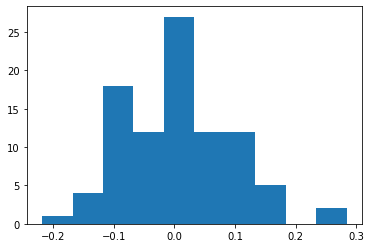

In [21]:
#Linear regression Assumption
#1.Error should be normally distributed
plt.hist(y_test-y_pred_test)

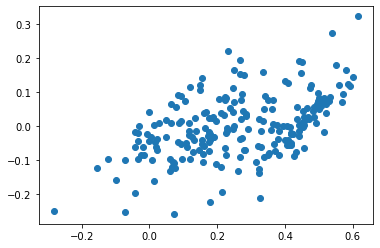

In [22]:
#Linear regression Assumption
#2.Error should be random and should have constant variance
plt.scatter(x=y_train,y=y_train-y_pred_train)

In [23]:
col

Index(['MEI', 'CO2', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols'], dtype='object')

In [24]:
#Creating a loop to check accuracy for eppending each independent variables
col1=[]
R2_train=[]
R2_test=[]
No_IV=[]
for i in col:
    x_train, x_test, y_train, y_test = train_test_split(df[col1],df['Temp'],test_size=0.3,random_state =5555)
    x_trainc = sm.add_constant(x_train)#add a constant to the model
    x_testc = sm.add_constant(x_test)#add a constant to the model 
    lm = sm.OLS(y_train,x_trainc)
    lm = sm.OLS(y_test,x_testc)    
    lm2 = lm.fit()
    y_pred_train= lm2.predict(x_trainc)
    R2_train.append(r2_score(y_train, y_pred_train))
    y_pred_test= lm2.predict(x_testc)
    R2_test.append(r2_score(y_test, y_pred_test))    
    No_IV.append(len(col1))
    col1.append(i)

<Figure size 576x432 with 0 Axes>

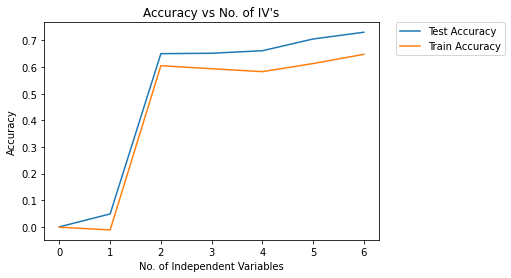

<Figure size 576x432 with 0 Axes>

In [25]:
#Plotting the Accuracy vs No. of Independent variables to check at which stage the Train and Test accuracy are close to each other
plt.plot(No_IV,R2_test, label="Test Accuracy")
plt.plot(No_IV,R2_train, label="Train Accuracy")
plt.title("Accuracy vs No. of IV's")
plt.xlabel("No. of Independent Variables")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.figure(figsize=(8,6))
